# Sarcasm Detection
 **Acknowledgement**

Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

## Install `Tensorflow2.0` 

In [0]:
#!!pip uninstall tensorflow
#!pip install tensorflow==2.0.0

## Get Required Files from Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
#Set your project path 
import os
project_path = '/content/drive/My Drive/GL AIML/Project 12 - Sarcasm Detection NLP'
os.chdir(project_path)

In [4]:
os.listdir()

['glove.6B.zip',
 'Sarcasm_Headlines_Dataset.json',
 'glove.6B.50d.txt',
 'glove.6B.100d.txt',
 'glove.6B.200d.txt',
 'glove.6B.300d.txt']

#**## Reading and Exploring Data**

## Read Data "Sarcasm_Headlines_Dataset.json". Explore the data and get  some insights about the data. ( 4 marks)
Hint - As its in json format you need to use pandas.read_json function. Give paraemeter lines = True.

In [0]:
import json
import numpy as np
import pandas as pd
df = pd.read_json(project_path+'/Sarcasm_Headlines_Dataset.json', lines=True)

In [6]:
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [7]:
df.shape

(26709, 3)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
article_link    26709 non-null object
headline        26709 non-null object
is_sarcastic    26709 non-null int64
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


([<matplotlib.patches.Wedge at 0x7fe8581dbef0>,
 [Text(-0.2663295914373044, 1.067271544043426, 'Sarcastic'),
  Text(0.2663295914373043, -1.0672715440434262, 'Not Sarcastic')],
 [Text(-0.14527068623852965, 0.5821481149327777, '43.90%'),
  Text(0.1452706862385296, -0.5821481149327778, '56.10%')])

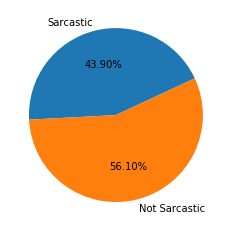

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

labels = ['Sarcastic', 'Not Sarcastic']
count_sarcastic = len(df[df['is_sarcastic']==1])
count_notsar = len(df[df['is_sarcastic']==0])
values = [count_sarcastic, count_notsar]
plt.pie(values,labels=labels, startangle=25,autopct='%1.2f%%')

<font color='blue'>Well it's seems that our data is little imbalanced on each labels.(13% percent difference).<br>
I won't make it balanced now and would see how confusion matrix results showing up after our model is trained.</font>

## Drop `article_link` from dataset. ( 2 marks)
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [10]:
df = df.drop(labels=['article_link'], axis=1)
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


## Get the Length of each line and find the maximum length. ( 4 marks)
As different lines are of different length. We need to pad the our sequences using the max length.

In [0]:
df_new = df.copy()

In [0]:
## TOTAL NUMBER OF WORDS USED IN EACH HEADLINE
df_new['nb_words'] = df_new.headline.apply(lambda x: len(x.split()))

## TOTAL NUMBER OF UNIQUE WORDS USED IN EACH HEADLINE
df_new['nb_unique_words'] = df_new.headline.apply(lambda x: len(set(x.split())))

## TOTAL NUMBER OF CHARACTERS USED IN EACH HEADLINE
df_new['nb_char'] = df_new.headline.apply(lambda x: len(x))

In [13]:
df_new.head()

,headline,is_sarcastic,nb_words,nb_unique_words,nb_char
0,former versace store clerk sues over secret 'b...,0,12,12,78
1,the 'roseanne' revival catches up to our thorn...,0,14,14,84
2,mom starting to fear son's web series closest ...,1,14,13,79
3,"boehner just wants wife to listen, not come up...",1,13,13,84
4,j.k. rowling wishes snape happy birthday in th...,0,11,11,64


In [14]:
maxlen = df_new['nb_words'].max()
print(maxlen)

39


#**## Modelling**

## Import required modules required for modelling.

In [15]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

# Set Different Parameters for the model. ( 2 marks)

In [0]:
max_features = 10000
maxlen = maxlen## Add your max length here ##
embedding_size = 200

## Apply Keras Tokenizer of headline column of your data.  ( 4 marks)
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [0]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(df['headline']))

# Define X and y for your model.

In [18]:
X = tokenizer.texts_to_sequences(df['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(df['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 26709
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0  307  678 3336 2297   47  381 2575    5 2576 8433]
Number of Labels:  26709
0


## Get the Vocabulary size ( 2 marks)
Hint : You can use tokenizer.word_index.

In [19]:
word_index = tokenizer.word_index
num_words = len(word_index)+1
print(num_words)

29657


#**## Word Embedding**

## Get Glove Word Embeddings

In [0]:
glove_file = project_path + "/glove.6B.zip"

In [0]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

# Get the Word Embeddings using Embedding file as given below.

In [0]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    #print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    #print(embd)
    embeddings[word] = embd

# Create a weight matrix for words in training docs

In [23]:
embedding_matrix = np.zeros((num_words, embedding_size))

for word, i in tokenizer.word_index.items():
  if i >= max_features: continue
  embedding_vector = embeddings.get(word)
  if embedding_vector is not None:
     embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

## Create and Compile your Model  ( 7 marks)
Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


In [24]:
### Embedding layer for hint 
## model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
### Bidirectional LSTM layer for hint 
## model.add(Bidirectional(LSTM(128, return_sequences = True)))
model = Sequential()
model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(GlobalMaxPool1D())
model.add(Dense(40, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(20, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy ( 5 marks)

In [25]:
from keras.callbacks import EarlyStopping
history = model.fit(X,y,batch_size=100,epochs=5,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Using TensorFlow backend.


Train on 21367 samples, validate on 5342 samples
Epoch 1/5
21367/21367 [==============================] - 27s 1ms/sample - loss: 0.5372 - acc: 0.7173 - val_loss: 0.3790 - val_acc: 0.8383
Epoch 2/5
21367/21367 [==============================] - 26s 1ms/sample - loss: 0.3186 - acc: 0.8757 - val_loss: 0.3308 - val_acc: 0.8594
Epoch 3/5
21367/21367 [==============================] - 26s 1ms/sample - loss: 0.2170 - acc: 0.9221 - val_loss: 0.3395 - val_acc: 0.8637


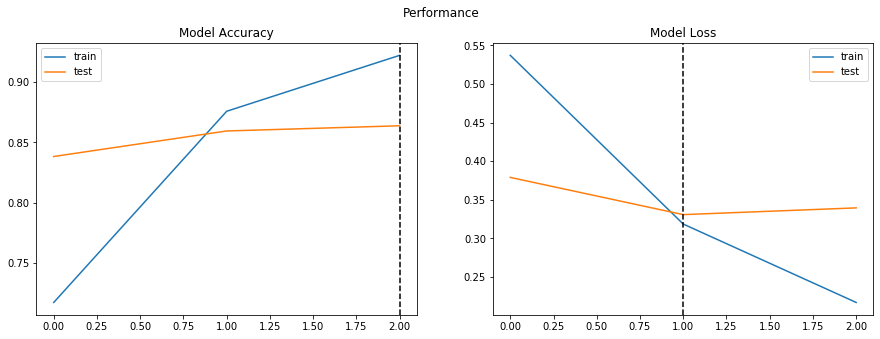

In [26]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fig.suptitle("Performance")
ax1.plot(history.history['acc'])
ax1.plot(history.history['val_acc'])
cut = np.where(history.history['val_acc'] == np.max(history.history['val_acc']))[0][0]
ax1.axvline(x=cut, color='k', linestyle='--')
ax1.set_title("Model Accuracy")
ax1.legend(['train', 'test'])

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
cut = np.where(history.history['val_loss'] == np.min(history.history['val_loss']))[0][0]
ax2.axvline(x=cut, color='k', linestyle='--')
ax2.set_title("Model Loss")
ax2.legend(['train', 'test'])
plt.show()